<h1 style="text-align: center;">[Bank Marketing Campaign Model]</h1>
<h3 style="text-align: center;">[Bachtiar Mardiansyah]</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

Bank X melakukan perencanaan untuk meningkatkan valuasi melalui kampanye, sebab sebelumnya belum terukur sehingga tidak dapat ditinjau. Kemudian saya sebagai Marketing Analysis melakukan pratinjau untuk memprediksi nasabah yang tertarik untuk melakukan efiensi waktu.


**1.2 Problem Statements**

Belum maksimalnya model marketing analysis yang digunakan sehingga mempengaruhi efisiensi waktu.

**1.3 Goals**

Guna meningkatkan efektivitas pemasaran dan akuisisi nasabah deposito, bank berupaya mengidentifikasi nasabah dengan probabilitas tertinggi untuk membuka rekening. Untuk mencapai ini, bank menerapkan model machine learning prediktif yang dapat menentukan kecenderungan seorang nasabah untuk melakukan pembukaan deposito. Dengan hasil analisis ini, bank dapat memprioritaskan dan mengarahkan upaya pemasarannya secara eksklusif kepada segmen nasabah yang paling reseptif dan berpotensi.

**1.4 Analytical Approach**

Proyek ini bertujuan mengurangi biaya pemasaran dengan membangun model prediktif. Tugas saya sebagai Strategic Marketing Analyst adalah membuat model supervised learning jenis klasifikasi. Alasan penggunaan metode ini adalah ketersediaan data historis yang sudah memiliki label target, yaitu apakah nasabah melakukan 'deposito' atau tidak.

Model ini tidak hanya akan memprediksi kecenderungan nasabah untuk berdeposito, tetapi dalam proses pembuatannya, model ini juga akan menganalisis data lampau. Faktor-faktor seperti jumlah kontak, durasi, dan hasil kampanye sebelumnya akan dianalisis untuk menentukan pendorong utama (key drivers) dari efektivitas pemasaran.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

Sasaran model ini adalah untuk mengklasifikasikan nasabah: 0 (tidak tertarik deposito) dan 1 (tertarik deposito). Ada dua risiko kesalahan yang harus dipertimbangkan:

Type I Error (False Positive): Model salah memprediksi nasabah sebagai 'tertarik' (Prediksi 1), padahal aslinya tidak (Aktual 0). Implikasinya adalah pemborosan biaya pemasaran pada audiens yang tidak relevan.

Type II Error (False Negative): Model salah memprediksi nasabah sebagai 'tidak tertarik' (Prediksi 0), padahal aslinya mereka berminat (Aktual 1). Implikasinya adalah kehilangan peluang pendapatan karena mengabaikan prospek yang potensial.

**1.6 Success Criteria**

Kriteria Bisnis,Metrik,Target Minimal,Justifikasi

Kriteria Bisnis,Metrik,Target Minimal,Justifikasi (Mengapa Penting?)
Efisiensi Anggaran (Meminimalisir Biaya),Peningkatan Precision (Presisi) dari kontak pemasaran.,Minimal 75%,"Meminimalisir Type I Error (False Positive). Artinya, dari setiap 100 nasabah yang kita hubungi, setidaknya 75 orang benar-benar berminat. Ini mengurangi pemborosan biaya kontak pada nasabah yang tidak tertarik."
Peningkatan Konversi & Pendapatan,Tingkat Konversi (Conversion Rate) dari targeted list model Anda vs. baseline (target random/generik).,Peningkatan Konversi ≥20%,Memastikan model benar-benar lebih baik daripada metode penargetan sebelumnya. Peningkatan ini secara langsung menyumbang pada pendapatan dan valuasi bank.
Skalabilitas dan Penerapan,Kecepatan Implementasi (Latency).,< 2 jam,Model harus dapat menghasilkan list nasabah target dalam waktu yang wajar sebelum kampanye diluncurkan atau diperbarui.
Penghematan Biaya Pemasaran,Penurunan Cost Per Acquisition (CPA).,Penurunan CPA ≥15%,"Ini adalah ukuran finansial langsung. Semakin rendah CPA, semakin efisien strategi pemasaran Anda."

Kriteria Teknis,Metrik,Target Minimal,Justifikasi

Kinerja Inti Model,Precision Score (pada Test Set).,≥0.78,"Karena tujuan bisnis adalah mengurangi biaya (meminimalisir FP), Precision harus dijaga tinggi."
Kemampuan Menangkap Prospek,Recall Score (pada Test Set).,≥0.60,"Walaupun Precision lebih diutamakan, Recall tidak boleh terlalu rendah. Angka ini memastikan kita tidak kehilangan terlalu banyak nasabah yang potensial (Type II Error)."
Keseimbangan Kinerja,F1-Score.,≥0.70,F1-Score memberikan indikasi keseimbangan antara Precision dan Recall.
Daya Pisah Model,AUC-ROC Score.,≥0.85,Menunjukkan kemampuan model membedakan kelas 'Ya' dan 'Tidak'. Nilai AUC yang tinggi menunjukkan model memiliki daya prediksi yang kuat.
Keterandalan,Generalisasi Model (Perbedaan Kinerja Training Set vs. Test Set).,Perbedaan Akurasi ≤5%,Memastikan model tidak mengalami overfitting dan dapat bekerja dengan baik pada data baru yang belum pernah dilihat sebelumnya.

## **Section 2. Data Understanding**

**2.1 General Information**

Note :
- Dataset tidak seimbang
- Sebagian besar fitur bersifat kategori (Nominal, Ordinal, Label).
- Setiap baris data merepresentasikan informasi seorang nasabah yang yang pernah ditawarkan deposito.

**2.2 Feature Information**

| Feature | Description | Impact to Business |
|---------| ----------- | ------------------ |
| Age     | Umur Nasabah| Dapat mengetahui rentang umur nasabah |
| Job     | Pekerjaan Nasabah | Dapat mengetahui pekerjaan nasabah |
| Balance | Saldo | Untuk mengetahui saldo nasabah |
| Housing | Perumahan KPR | Nasabah yang memiliki KPR |
| Loan    | Pinjaman | Nasabah yang memiliki pinjaman di Bank |
| Contact | Tipe Komunikasi | Bentuk komunikasi saat marketer akan menghubungi |
| Month   | Bulan terakhir kontak | Informasi terakhir kontak |
| Campaign| Jumlah Kontak | Jumlah kontak yang dilakukan marketer saat menghubungi |
| Pdays | Jumlah Hari | Jumlah hari saat klien dihubungi |
| Poutcome | Hasil Kampanye | Hasil kampanye dari pemasaran sebelumnya |
| Deposit | Nasabah yang deposit | Nasabah yang dapat melakukan deposit atau tidak |



## **Section 3. Data Cleaning**

In [2]:
!pip install category_encoders
!pip install imblearn
!pip install --upgrade scikit-learn

In [3]:
!pip install --upgrade scikit-learn imbalanced-learn
!pip install scikit-learn==<version>
!pip install imbalanced-learn==<version>

The syntax of the command is incorrect.
The syntax of the command is incorrect.


In [4]:
!pip install --upgrade imbalanced-learn

In [5]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [6]:
bank_dataset = pd.read_csv("data_bank_marketing_campaign.csv")
bank_dataset.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [7]:
bank_dataset.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


In [8]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


**3.1 Missing Values**

<Axes: >

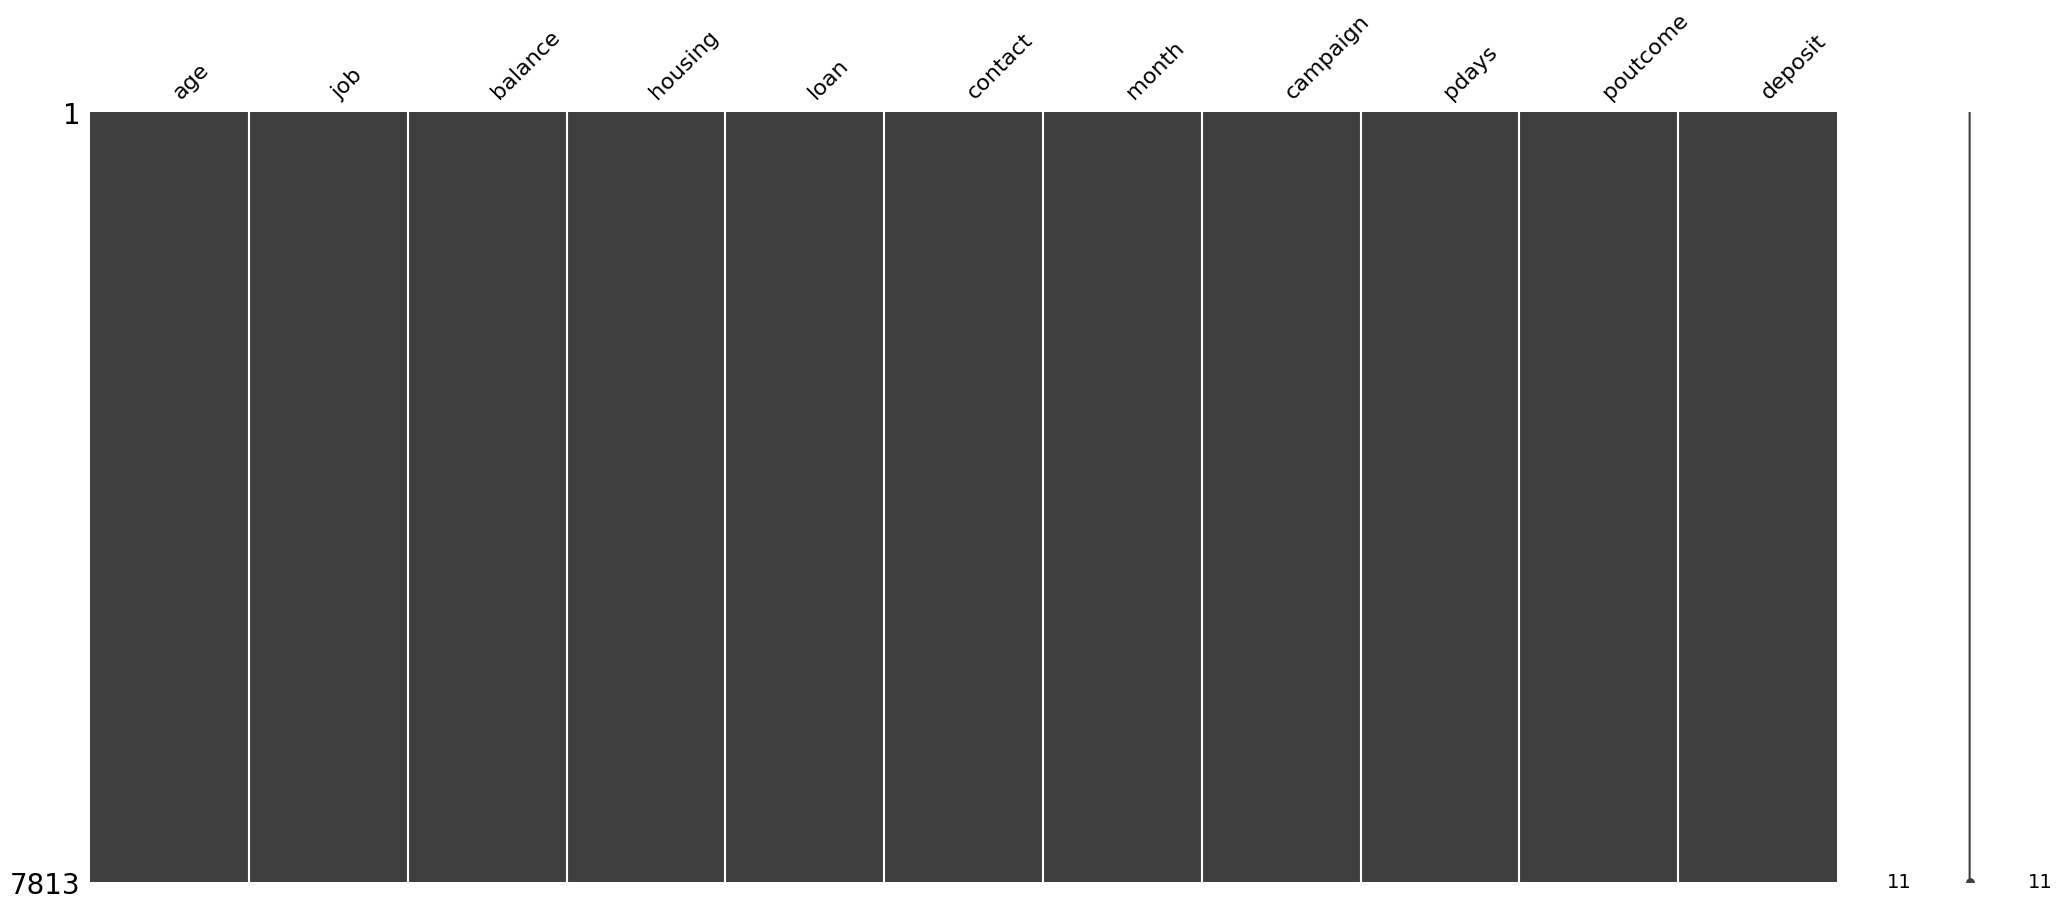

In [9]:
missingno.matrix(bank_dataset)

In [10]:
print('Data columns with null values:',bank_dataset.isnull().sum(), sep = '\n')

Data columns with null values:
age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64


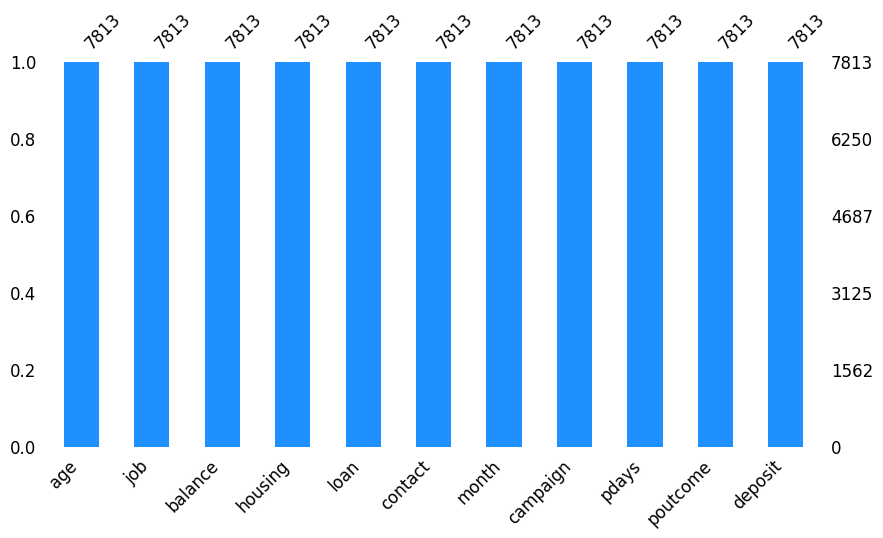

In [11]:
missingno.bar(bank_dataset,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Data tersebut belum ada missing value, tapi mari kita lihat data yang menyerupai nan

In [12]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in bank_dataset.columns :
    listItem.append( [col, bank_dataset[col].nunique(), bank_dataset[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


In [13]:
bank_dataset['contact'].value_counts()

contact
cellular     5628
unknown      1639
telephone     546
Name: count, dtype: int64

In [14]:
bank_dataset['job'].value_counts()

job
management       1792
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64

In [15]:
bank_dataset['poutcome'].value_counts()

poutcome
unknown    5819
failure     848
success     761
other       385
Name: count, dtype: int64

Ternyata ada fitur yang menyerupai nan yaitu pada 'contact', 'job', 'poutcome'. Namun perlu dilakukan pengecekkan dimasing-masing fitur.

1. Nilai unknown pada fitur contact yaitu sampai 20% dari data. Dari beberapa referensi di kaggle, nilai unknown ini tidak di ganti nilainya. Namun, dibiarkan saja.

2. Nilai unknown pada fitur job hanya mencapai 0,6% dari data, maka diisi dengan nilai modus saja menggunakan imputer.

3. Nilai unknown pada fitur poutcome sangat mendominasi yaitu sampai 75% dari total keseluruhan data. Jadi lebih baik fitur poutcome di hapus saja.

In [16]:
bank_model = bank_dataset.copy()

**3.3 Data Cleaning**

Setelah menemukan missing values, mari kita bersihkan dan isi nilainya

In [17]:
# Konversi nilai "unknown" menjadi NaN
bank_model['job'].replace('unknown', np.nan, inplace=True)

# Membuat objek imputer dengan strategi 'most_frequent' (modus)
imputer = SimpleImputer(strategy='most_frequent')

# Mengisi nilai NaN dengan modus pada kolom 'job'
bank_model['job'] = imputer.fit_transform(bank_model[['job']]).flatten()

In [18]:
bank_model

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,management,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [19]:
bank_model

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,management,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [20]:
bank_model.job.value_counts()

job
management       1846
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
Name: count, dtype: int64

In [21]:
bank_model.contact.value_counts()

contact
cellular     5628
unknown      1639
telephone     546
Name: count, dtype: int64

In [22]:
# Menghapus fitur 'poutcome' dari DataFrame
bank_model.drop(columns=['poutcome'], inplace=True)

In [23]:
bank_model

,age,job,balance,housing,loan,contact,month,campaign,pdays,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,yes
2,51,admin.,3025,no,no,cellular,may,1,352,yes
3,38,services,-87,yes,no,cellular,may,1,-1,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,no
...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,yes
7810,36,management,179,no,no,cellular,aug,8,-1,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,no


**3.2 Duplicated Values**

In [24]:
duplikat = bank_model[bank_dataset.duplicated()]
duplikat


,age,job,balance,housing,loan,contact,month,campaign,pdays,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,no
4368,60,management,0,no,no,cellular,aug,3,-1,yes
4874,41,management,0,no,no,cellular,aug,2,-1,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,no
5609,39,technician,0,yes,no,unknown,may,1,-1,no
5681,38,technician,0,no,no,cellular,aug,2,-1,no
5905,34,management,0,no,no,cellular,aug,2,-1,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,yes


In [25]:
bank_model.drop_duplicates(inplace=True)

Data duplicate diatas yang perlu di drop ada 8

In [26]:
# Mendeteksi duplikat data dalam dataframe
duplikat = bank_model.duplicated()
duplikat.value_counts() #hasilnya false tidak ada duplikat

False    7805
Name: count, dtype: int64

**Data tidak terdeteksi ada yang duplicate**

Lihat outlier data melalui data numerik dengan boxplot

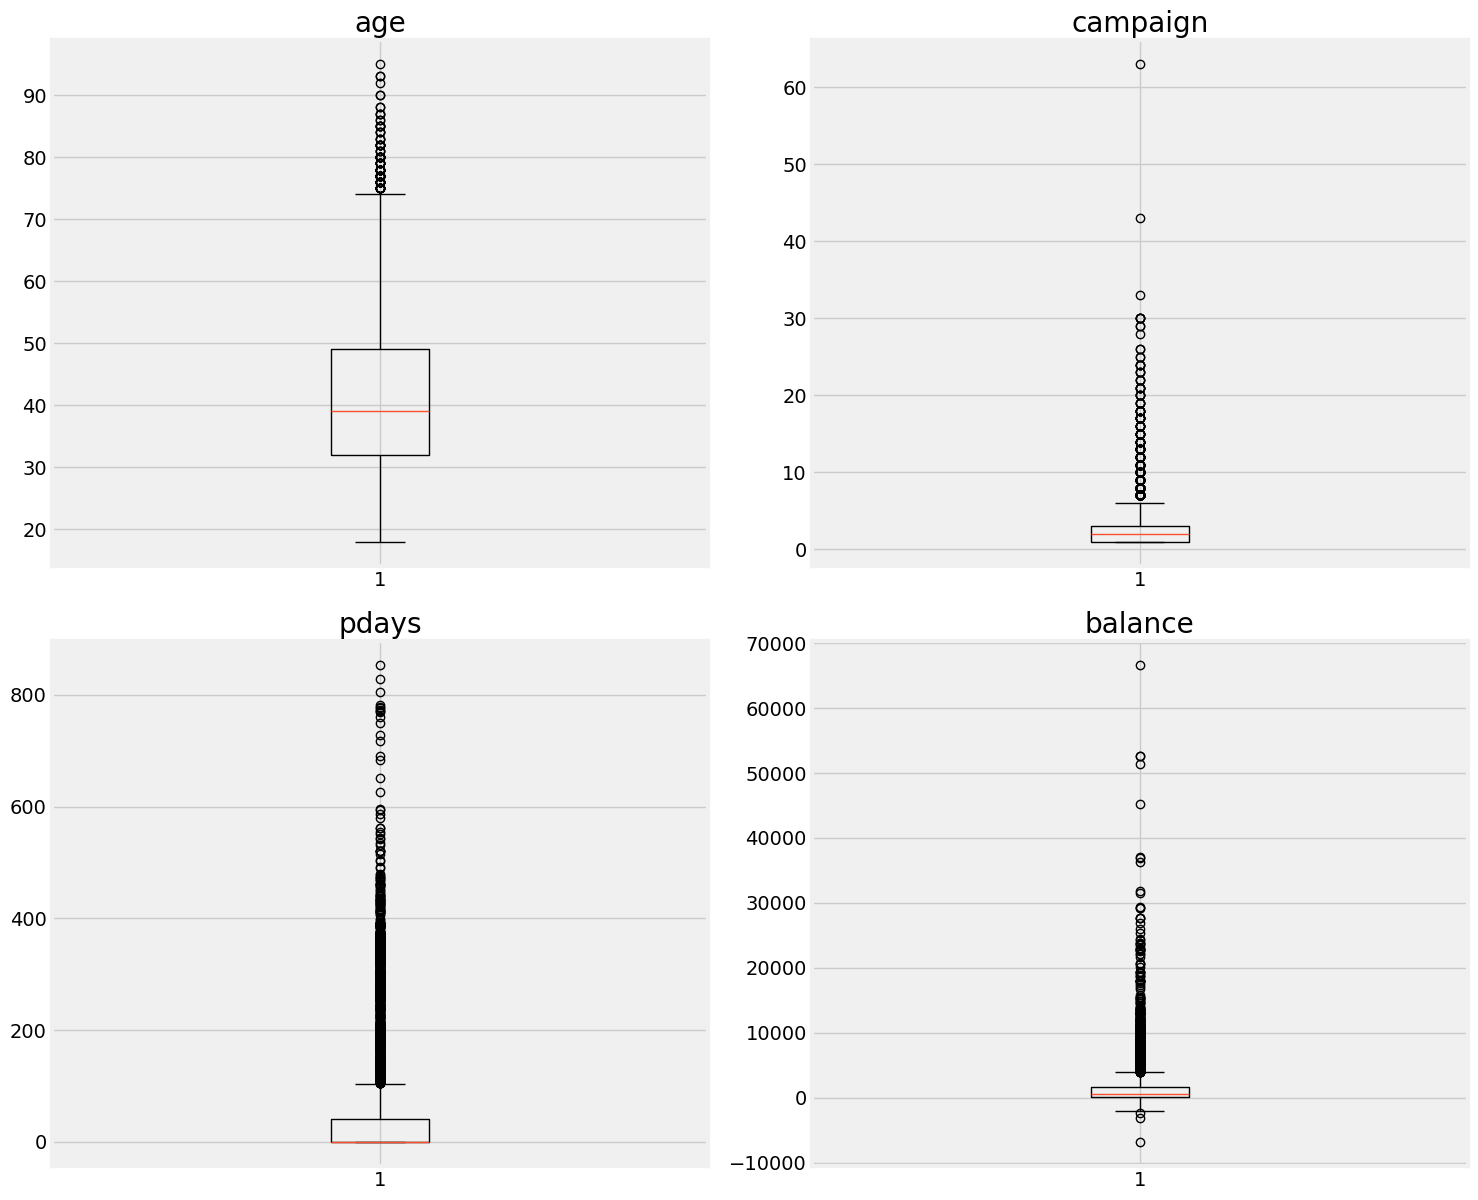

In [27]:
# Mengubah nama style menjadi yang valid
plt.figure(figsize = (15, 30))
plt.style.use('fivethirtyeight') 
ax=plt.subplot(521)
plt.boxplot(bank_model['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank_model['campaign'])
ax.set_title('campaign')
ax=plt.subplot(523)
plt.boxplot(bank_model['pdays'])
ax.set_title('pdays')
ax=plt.subplot(524)
plt.boxplot(bank_model['balance'])
ax.set_title('balance')
plt.tight_layout() # Disarankan untuk tata letak yang lebih rapi
plt.show() # Gunakan plt.show() di lingkungan Jupyter/lokal

Analisis Distribusi dan Penghapusan Outlier (IQR Method)

Sebelum membersihkan data, kita perlu memahami distribusi fitur numerik kontinu untuk mengidentifikasi keberadaan outlier.

#### Konsep Dasar IQR:

Metode **Interquartile Range (IQR)** digunakan untuk menetapkan batas ekstrem guna mengidentifikasi dan menangani outlier (nilai yang berada di luar batas bawah atau batas atas).

1.  **Quartile 1 (Q1)**: Persentil ke-25.
2.  **Quartile 3 (Q3)**: Persentil ke-75.
3.  **IQR** = Q3 - Q1.
4.  **Batas Bawah** = Q1 - (1.5 * IQR)
5.  **Batas Atas** = Q3 + (1.5 * IQR)

Nilai di luar batas ini dianggap sebagai outlier yang dapat memengaruhi hasil analisis.

In [28]:
# Pilih kolom numerik dalam dataframe
numerical_features = bank_model.select_dtypes(include=['float64', 'int64'])

# Hitung IQR untuk setiap kolom numerik
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk mendefinisikan outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tentukan lokasi outlier
outliers = ((numerical_features < lower_bound) | (numerical_features > upper_bound)).any(axis=1)

outliers

0       False
1        True
2        True
3       False
4       False
        ...  
7808    False
7809     True
7810     True
7811    False
7812    False
Length: 7805, dtype: bool

Ada 2462 data yang outlier, artinya ada 31% data yang mengandung outlier. Mari kita hapus data yang mengandung outlier.

In [29]:
lower_bound

age            6.5
balance    -2207.5
campaign      -2.0
pdays        -64.0
dtype: float64

In [30]:
upper_bound

age           74.5
balance     4020.5
campaign       6.0
pdays        104.0
dtype: float64

In [31]:
# Hapus baris yang mengandung outlier
df = bank_model[~outliers]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5343 entries, 0 to 7812
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       5343 non-null   int64 
 1   job       5343 non-null   object
 2   balance   5343 non-null   int64 
 3   housing   5343 non-null   object
 4   loan      5343 non-null   object
 5   contact   5343 non-null   object
 6   month     5343 non-null   object
 7   campaign  5343 non-null   int64 
 8   pdays     5343 non-null   int64 
 9   deposit   5343 non-null   object
dtypes: int64(4), object(6)
memory usage: 459.2+ KB


Kita dapat menggunakan data yang bersih (tanpa outlier) yaitu df.

In [32]:
df.deposit.value_counts()

deposit
no     2968
yes    2375
Name: count, dtype: int64

**3.3 Identify Spelling Errors**

Tidak ada yang spelling yang error

Penjelasan Hasil VerifikasiSetelah menjalankan kode di atas, Anda akan melihat dua tabel verifikasi:Ringkasan Statistik Kolom Numerik: Menunjukkan bahwa nilai max dan std (standar deviasi) telah berkurang secara signifikan pada kolom _winsorized, menandakan penanganan outliers yang sukses.Verifikasi Missing Value: Semua nilai akan menjadi 0, yang mengonfirmasi bahwa semua nilai $\text{NaN}$ (yang berasal dari anomali 'unknown' dan -1) telah berhasil diimputasi atau diubah menjadi fitur baru.

## **Section 4. Exploratory Data Analysis (EDA)**

**4.1 Analysis 1**

In [33]:
# Definisikan dictionary untuk nilai pengganti
replace_values = {"yes": 1, "no": 0}

# Ganti nilai kolom "deposit" menggunakan metode replace
df['deposit'].replace(replace_values, inplace=True)

Merubah data menjadi numerikal dahulu, setelah itu kita cek

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5343 entries, 0 to 7812
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       5343 non-null   int64 
 1   job       5343 non-null   object
 2   balance   5343 non-null   int64 
 3   housing   5343 non-null   object
 4   loan      5343 non-null   object
 5   contact   5343 non-null   object
 6   month     5343 non-null   object
 7   campaign  5343 non-null   int64 
 8   pdays     5343 non-null   int64 
 9   deposit   5343 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 459.2+ KB


Explore Categorical Features

In [35]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job', 'housing', 'loan', 'contact', 'month']

In [36]:
for feature in categorical_features:
    print(feature,len(bank_dataset[feature].unique()))

job 12
housing 2
loan 2
contact 3
month 12


Ada 5 fitur tertinggi beserta jumlahnya

**Find Categorical Feature Distribution**

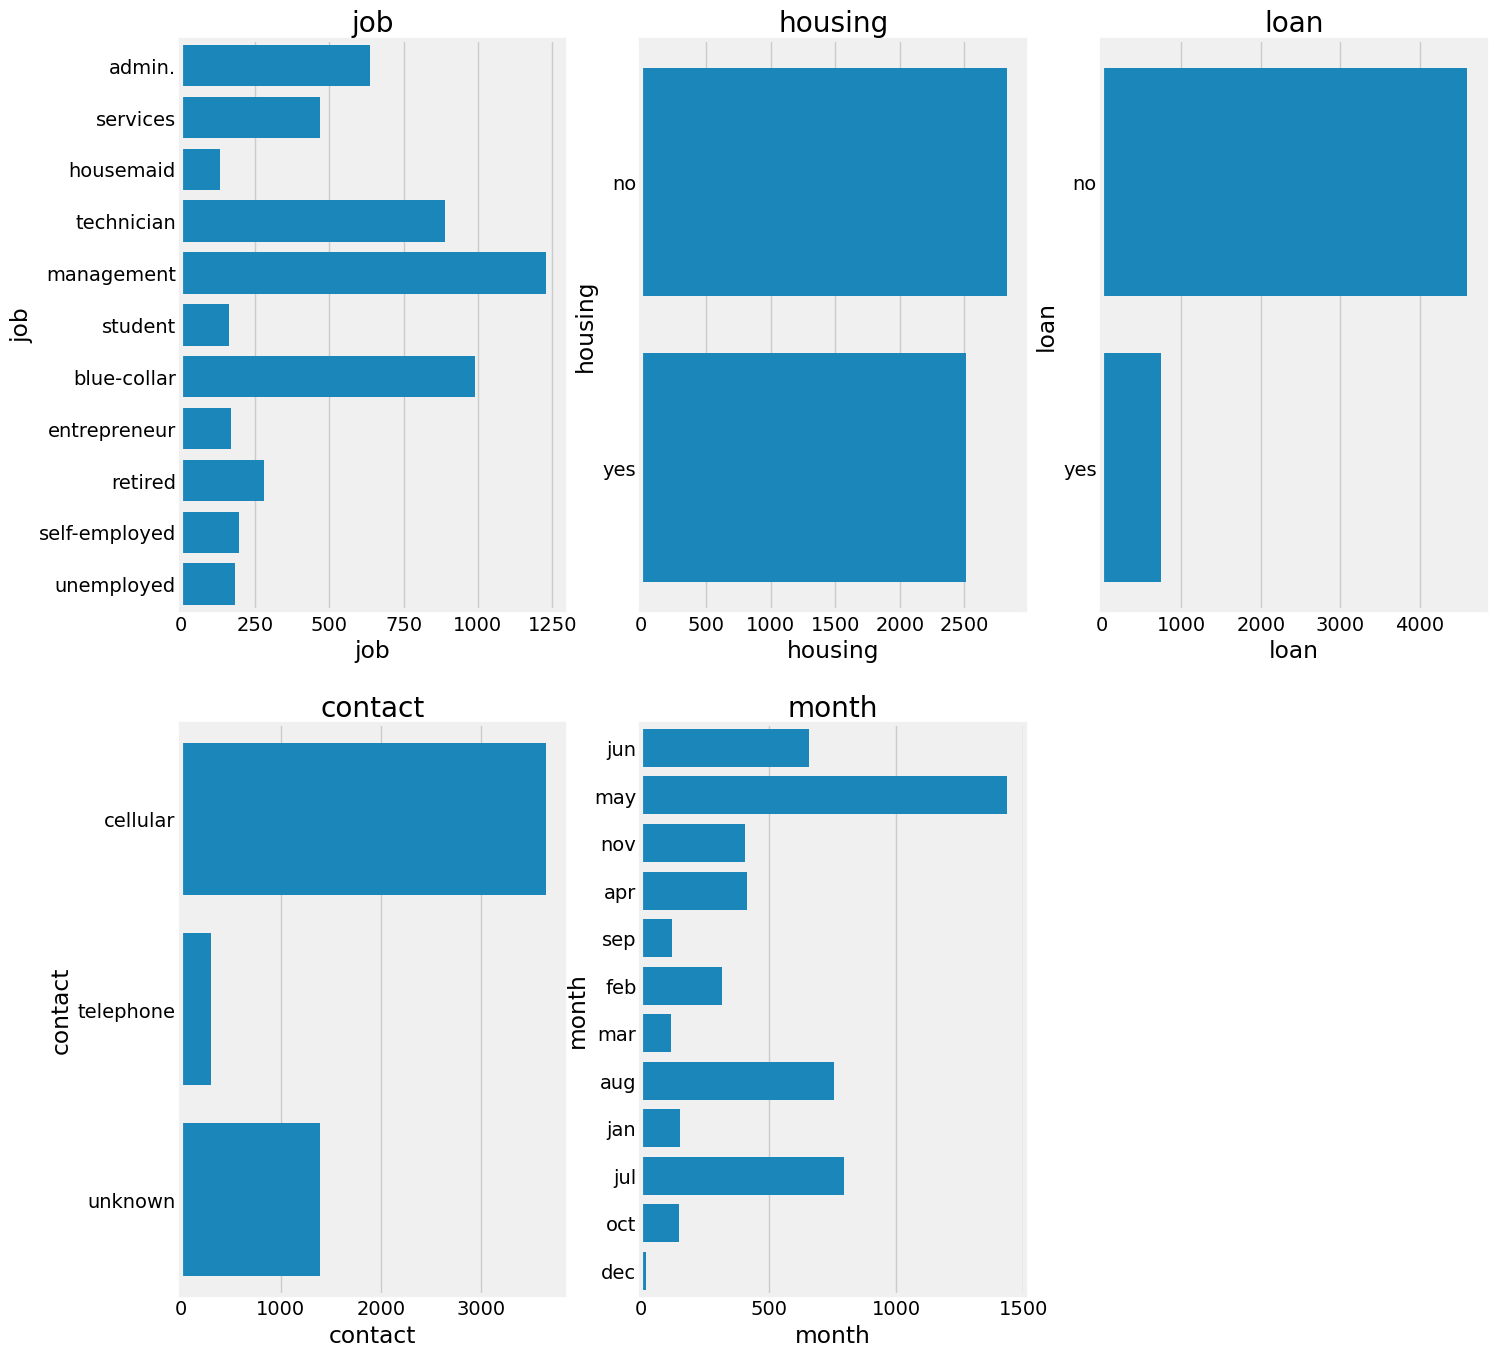

In [37]:
#check count based on categorical features
plt.figure(figsize=(15,100), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

Dapat disimpulkan jika :
- Nasabah terbanyak adalah dengan profesi manajemen dan blue-collar.
- Nasabah dari bank X kebanyakan tidak cicilan KPR rumah.
- Nasabah yang memiliki cicilan pinjaman juga sedikit.
- Nasabah rata-rata dihubungi melalui telepon seluler.
- Data nasabah yang dikontak di bulan Mei tinggi dan yang paling sedikit di bulan Desember.
- Tingkat keberhasilan kampanye sebelumnya tidak dapat dideteksi.

**Relationship between Categorical Features and Label**

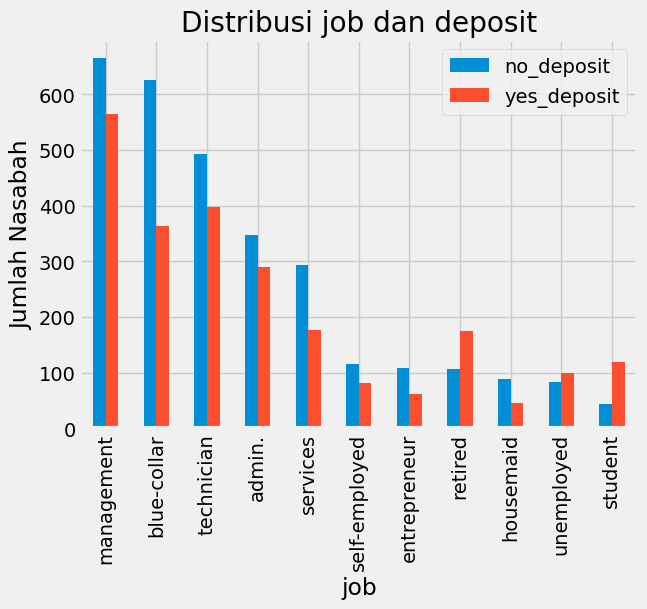

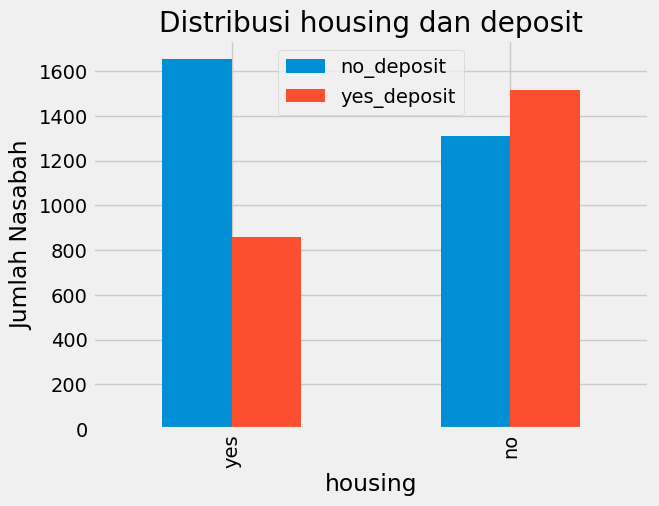

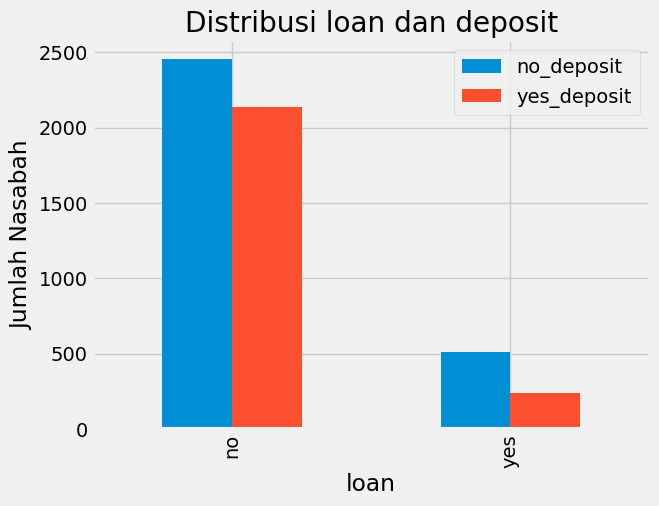

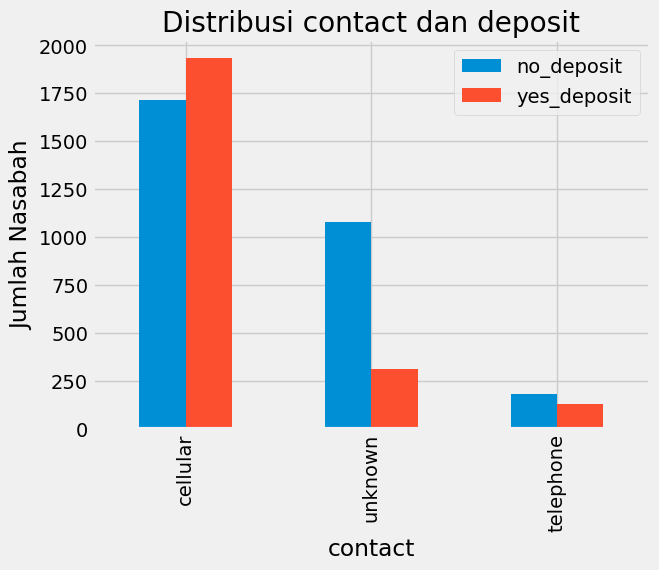

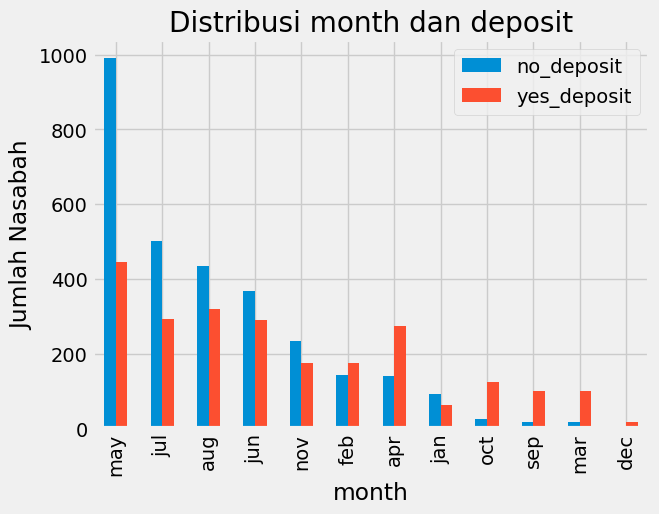

In [38]:
# Fungsi untuk plot distribusi nilai-nilai kategorikal dalam masing-masing kelompok "deposit" dan "no deposit"
def plot_bar(column):
    temp_df = pd.DataFrame()
    temp_df['no_deposit'] = df[df['deposit'] == 0][column].value_counts()
    temp_df['yes_deposit'] = df[df['deposit'] == 1][column].value_counts()
    temp_df.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Jumlah Nasabah')
    plt.title('Distribusi {} dan deposit'.format(column))
    plt.show()

# Plot distribusi untuk setiap fitur kategorikal
for feature in categorical_features:
    plot_bar(feature)


Dari beberapa fitur kategorikal didapatkan beberapa insight dalam faktor demografi dan keungan terhadap keputusan deposito bahwasanya:


1 Profesi (Pekerjaan):

- Meskipun profesi seperti management, blue-collar, dan technician menyumbang jumlah terbesar rekening deposito (karena populasi mereka besar), minat yang lebih tinggi terhadap deposito justru ditunjukkan oleh nasabah dengan status pensiun, pelajar (student), dan pengangguran (unemployed). Catatan: Keakuratan data profesi perlu diperhatikan, karena mungkin ada kasus di mana status nasabah tidak diperbarui.

2 Kepemilikan Rumah (Housing):

- Nasabah yang tidak memiliki utang KPR atau utang rumah lebih proaktif dalam membuka rekening deposito.

- Sebaliknya, nasabah yang sedang menanggung utang rumah cenderung menahan diri untuk tidak membuka deposito.

3 Pinjaman Pribadi (Loan):

- Terdapat kesamaan jumlah antara nasabah yang memiliki deposito dan tidak memiliki pinjaman pribadi.

- Namun, jika nasabah memiliki pinjaman pribadi, mereka cenderung enggan untuk membuka rekening deposito.

4 Kesimpulan Umum (Faktor Keuangan):

- Secara keseluruhan, profesi, kepemilikan rumah, dan pinjaman pribadi membentuk faktor risiko dan komitmen finansial yang kuat. Pola ini menunjukkan bahwa nasabah memprioritaskan pengurangan utang dan meminimalkan risiko sebelum membuat keputusan untuk berinvestasi atau menabung dalam bentuk deposito

Distribusi fitur numerik kontinu berperan sebagai peta topografi data, yang secara esensial memvisualisasikan sebaran dan kepadatan nilai-nilai di sepanjang rentang ukurnya. Analisis ini sangat krusial karena ia secara langsung mengungkap karakteristik mendasar dari data, memungkinkan analis untuk mengidentifikasi kecenderungan sentral (nilai umum), tingkat variasi, dan keberadaan anomali atau outliers yang berpotensi merusak integritas model. Dengan memahami distribusi ini—misalnya, bagaimana saldo nasabah tersebar—keputusan analitis selanjutnya, mulai dari strategi penanganan outliers hingga pemilihan model prediktif, dapat diambil dengan lebih terinformasi dan akurat, memastikan insight yang diperoleh benar-benar merefleksikan populasi yang dianalisis.

**Explore the Correlation between numerical features**

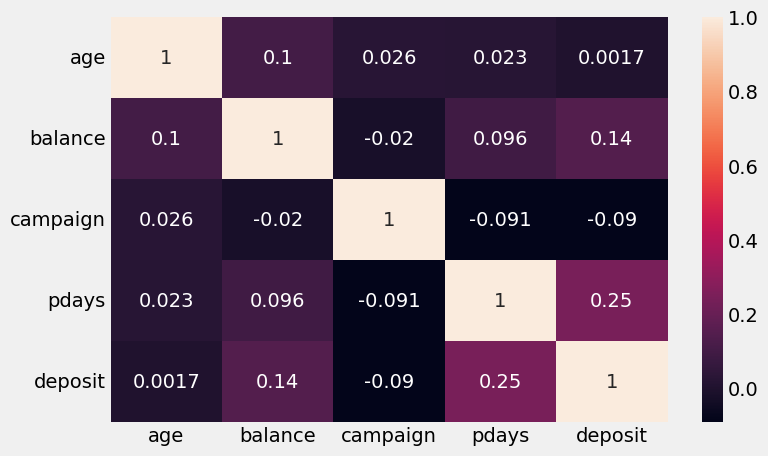

In [47]:
corr = df.corr(numeric_only=True)
fig = plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True)
plt.show()

Jika melihat heatmap diatas maka:
1. Korelasi Terkuat: Pdays (0.25)
- Pdays memiliki korelasi tertinggi (0.25) dengan deposit. Ini menunjukkan bahwa jumlah hari sejak kontak terakhir dengan klien dari kampanye sebelumnya adalah fitur yang paling erat hubungannya dengan keputusan deposit
- Meskipun 0.25 adalah nilai tertinggi di antara semua fitur, secara statistik ini diklasifikasikan sebagai korelasi lemah hingga sedang.
2. Korelasi Terkuat Kedua: Balance (0.14)
- Balance memiliki korelasi terkuat kedua (0.14) dengan deposit. Ini mendukung pernyataan Anda bahwa balance memiliki hubungan yang lebih kuat dibandingkan age atau campaign.
Sehingga terlihatlah bahwakorelasi yang lebih kuat dengan keputusan nasabah untuk membuka rekening deposito daripada nasabah lainnya dari 'Pdays' dan 'Balance'

In [48]:
df['deposit'].groupby(df['deposit']).count()

deposit
0    2968
1    2375
Name: deposit, dtype: int64

In [49]:
# Cetak nilai maksimum dan minimum dari kolom "balance"
max_balance = df['balance'].max()
min_balance = df['balance'].min()

print("Nilai maksimum balance:", max_balance)
print("Nilai minimum balance:", min_balance)

Nilai maksimum balance: 4017
Nilai minimum balance: -1965


Melakukan binning

In [50]:
import pandas as pd

# Contoh data balance
df.balance

# Tentukan jumlah bin dan rentang nilai untuk setiap bin
num_bins = 4
bin_ranges = [-2000, 0, 2000, 5000, float('inf')]  # Gunakan float('inf') untuk nilai tak terbatas

# Lakukan binning menggunakan pd.cut
balance_bins = pd.cut(df.balance, bins=bin_ranges, labels=['Very Low','Low', 'Medium', 'High'])

# Tampilkan hasil binning
print(balance_bins)


0            Low
3       Very Low
4            Low
5       Very Low
7            Low
          ...   
7804         Low
7807    Very Low
7808         Low
7811         Low
7812         Low
Name: balance, Length: 5343, dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'Medium' < 'High']


In [51]:
# Gabungkan balance_bins dengan DataFrame df
df = df.assign(balance_bins=balance_bins)

# Tampilkan DataFrame df setelah penggabungan
print(df)


      age         job  balance housing loan    contact month  campaign  pdays  \
0      55      admin.     1662      no   no   cellular   jun         2     -1   
3      38    services      -87     yes   no   cellular   may         1     -1   
4      36   housemaid      205     yes   no  telephone   nov         4     -1   
5      41      admin.      -76     yes   no   cellular   apr         1     -1   
7      36  technician      911     yes  yes   cellular   may         2     21   
...   ...         ...      ...     ...  ...        ...   ...       ...    ...   
7804   52      admin.      423     yes  yes   cellular   oct         2     96   
7807   33  management        0     yes  yes   cellular   may         2     -1   
7808   62   housemaid        2      no   no   cellular   nov         1     -1   
7811   31      admin.       54     yes   no   cellular   nov         1     -1   
7812   60     retired     1588      no   no   cellular   oct         1     -1   

      deposit balance_bins 

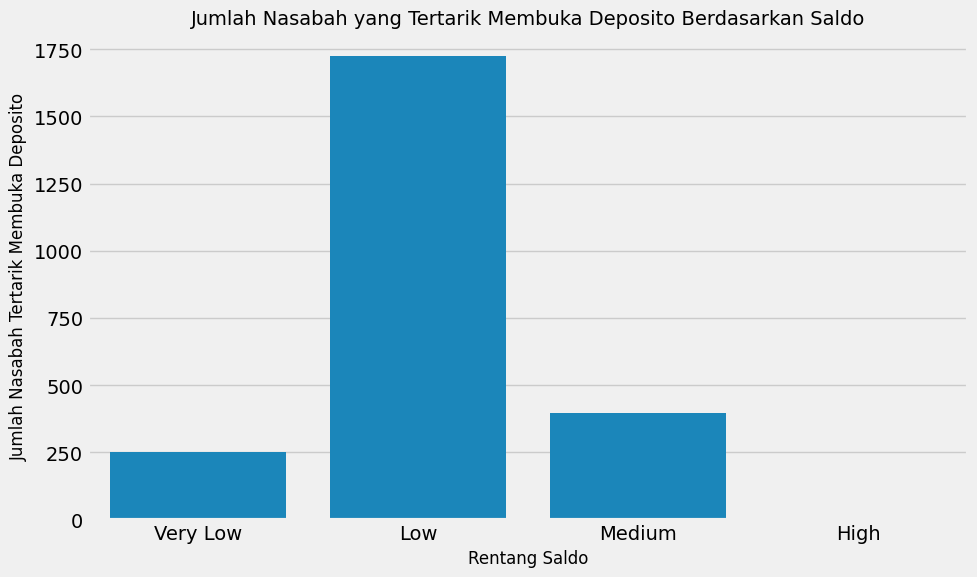

In [ ]:
# 1. Filter data hanya untuk deposit dengan nilai 1
df_deposit = df[df['deposit'] == 1]

# 2. Hitung jumlah deposit untuk setiap rentang saldo
deposit_counts = df_deposit.groupby('balance_bins').size().reset_index(name='jumlah_deposit')

# KOREKSI PENTING: Mendefinisikan urutan kategori untuk plot
order_bins = ['Very Low', 'Low', 'Medium', 'High']

# 3. Visualisasi menggunakan Seaborn
plt.figure(figsize=(10, 6)) # Ditingkatkan agar lebih banyak ruang

sns.barplot(
    x='balance_bins',
    y='jumlah_deposit',
    data=deposit_counts,
    order=order_bins # Menggunakan urutan yang telah didefinisikan
)

# Menghapus plt.xticks(rotation=45) yang salah.
# Jika label sumbu X masih bertabrakan, gunakan: plt.xticks(rotation=0) atau plt.xticks(rotation=15)

plt.title('Jumlah Nasabah yang Tertarik Membuka Deposito Berdasarkan Saldo', fontsize=14)
plt.xlabel('Rentang Saldo', fontsize=12)
plt.ylabel('Jumlah Nasabah Tertarik Membuka Deposito', fontsize=12)

# Menggunakan tight_layout untuk memastikan semua elemen plot terlihat rapi
plt.tight_layout()

plt.show()

Nasabah yang cendrung tertarik membuka deposito adalah nasabah yang tidak memiliki saldo yang tinggi.

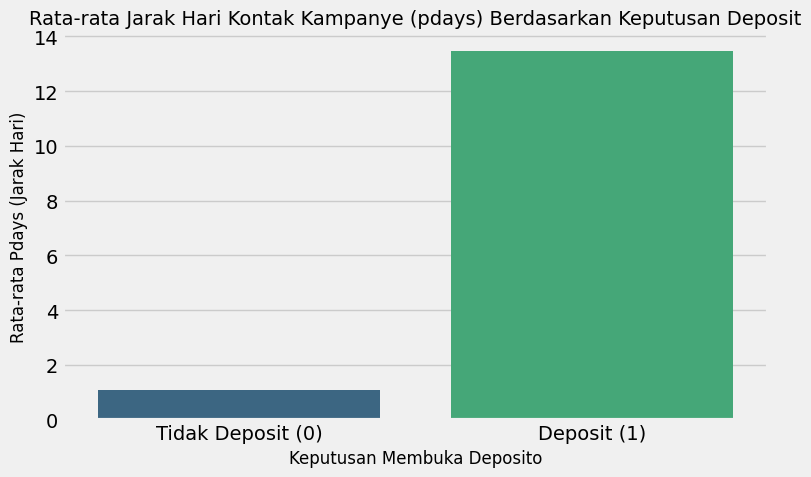

In [ ]:
# 1. Hitung rata-rata 'pdays' (jarak hari) untuk setiap kelompok 'deposit'
average_pdays = df.groupby('deposit')['pdays'].mean().reset_index()

# 2. Mapping label 'deposit' (0 dan 1) menjadi teks yang lebih jelas
average_pdays['deposit_label'] = average_pdays['deposit'].map({0: 'Tidak Deposit (0)', 1: 'Deposit (1)'})

# 3. Visualisasi menggunakan Seaborn
plt.figure(figsize=(8, 5)) # Ukuran plot diperbesar

sns.barplot(
    x='deposit_label',
    y='pdays',
    data=average_pdays,
    palette='viridis' # Menggunakan palet warna
)

# 4. Merapikan Judul dan Label Sumbu
plt.title('Rata-rata Jarak Hari Kontak Kampanye (pdays) Berdasarkan Keputusan Deposit', fontsize=14)
plt.xlabel('Keputusan Membuka Deposito', fontsize=12)
plt.ylabel('Rata-rata Pdays (Jarak Hari)', fontsize=12)

# Menggunakan tight_layout untuk memastikan semua elemen plot terlihat rapi
plt.tight_layout()

plt.show()

Terlihat bahwa semakin dekat jarak hari setelah klien dihubungi setelah campaign tidak membuat nasabah untuk tertarik membuka rekening deposito. Mungkin saja, nasabah masih dalam masa mempertimbangkan untuk membuka deposito atau tidak.

Melakukan kategorisasi umur:
Bayi dan balita < 5 tahun
Anak-anak 5 -9 tahun
Remaja 10 - 18 tahun
Dewasa 19 - 59 tahun
Lansia 60+ tahun

In [58]:
# Tentukan rentang nilai untuk setiap kelompok
age_ranges = [0, 9, 17, 59, float('inf')]  # Gunakan float('inf') untuk nilai tak terbatas

# Tentukan label untuk setiap kelompok
age_labels = ['Anak-anak', 'Remaja', 'Dewasa', 'Lansia']

# Lakukan binning menggunakan pd.cut
age_group = pd.cut(df.age, bins=age_ranges, labels=age_labels, right=False)

age_group

0       Dewasa
3       Dewasa
4       Dewasa
5       Dewasa
7       Dewasa
         ...  
7804    Dewasa
7807    Dewasa
7808    Lansia
7811    Dewasa
7812    Lansia
Name: age, Length: 5343, dtype: category
Categories (4, object): ['Anak-anak' < 'Remaja' < 'Dewasa' < 'Lansia']

In [59]:
# Gabungkan balance_bins dengan DataFrame df
df = df.assign(age_group=age_group)

# Tampilkan DataFrame df setelah penggabungan
print(df)

      age         job  balance housing loan    contact month  campaign  pdays  \
0      55      admin.     1662      no   no   cellular   jun         2     -1   
3      38    services      -87     yes   no   cellular   may         1     -1   
4      36   housemaid      205     yes   no  telephone   nov         4     -1   
5      41      admin.      -76     yes   no   cellular   apr         1     -1   
7      36  technician      911     yes  yes   cellular   may         2     21   
...   ...         ...      ...     ...  ...        ...   ...       ...    ...   
7804   52      admin.      423     yes  yes   cellular   oct         2     96   
7807   33  management        0     yes  yes   cellular   may         2     -1   
7808   62   housemaid        2      no   no   cellular   nov         1     -1   
7811   31      admin.       54     yes   no   cellular   nov         1     -1   
7812   60     retired     1588      no   no   cellular   oct         1     -1   

      deposit balance_bins 

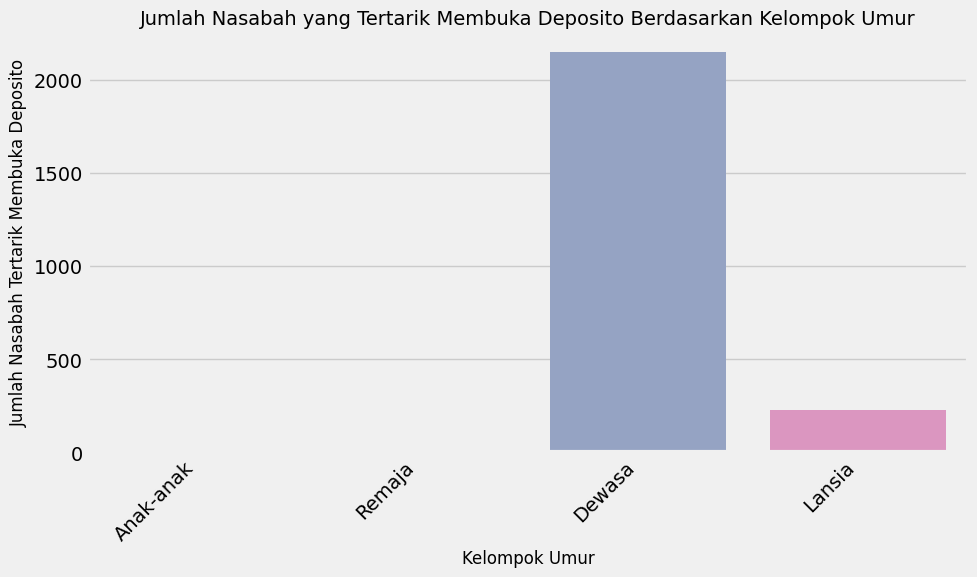

In [61]:
# 1. Filter data hanya untuk deposit dengan nilai 1
df_deposit = df[df['deposit'] == 1]

# 2. Hitung jumlah deposit untuk setiap rentang umur
deposit_counts = df_deposit.groupby('age_group').size().reset_index(name='jumlah_deposit')

# KOREKSI PENTING: Mendefinisikan urutan kategori untuk plot
# Asumsi: Kelompok umur diurutkan dari termuda ke tertua. 
# Anda harus mengganti list di bawah ini sesuai dengan nama persis 'age_group' Anda.
# Contoh urutan logis:
# order_age = ['18-30', '31-40', '41-50', '51-60', '>60'] 
# Untuk saat ini, kita akan coba mengurutkan secara alami (jika nama grup berupa string yang bisa diurutkan).

# 3. Visualisasi menggunakan Seaborn
plt.figure(figsize=(10, 6)) # Ukuran plot diperbesar

# Jika Anda tahu urutan yang benar, gunakan argumen 'order=' seperti ini:
# sns.barplot(x='age_group', y='jumlah_deposit', data=deposit_counts, order=order_age)
sns.barplot(
    x='age_group',
    y='jumlah_deposit',
    data=deposit_counts,
    palette='Set2' # Menambahkan palet warna
)

# 4. Merapikan Judul dan Label Sumbu
# KOREKSI JUDUL: Mengubah 'Saldo' menjadi 'Umur'
plt.title('Jumlah Nasabah yang Tertarik Membuka Deposito Berdasarkan Kelompok Umur', fontsize=14)
plt.xlabel('Kelompok Umur', fontsize=12)
plt.ylabel('Jumlah Nasabah Tertarik Membuka Deposito', fontsize=12)

# Mengatur rotasi sumbu X. Kita pertahankan 45 derajat agar tidak bertumpuk jika label panjang.
plt.xticks(rotation=45, ha='right') # 'ha' (horizontal alignment) disetel ke 'right' agar terlihat lebih rapi

# Menggunakan tight_layout untuk memastikan semua elemen plot terlihat rapi
plt.tight_layout()

plt.show()

Nasabah dengan rentang umur 30 - 40, lebih tertarik membuka deposito.


In [62]:
df = df.drop(['age', 'balance'], axis=1)

df

,job,housing,loan,contact,month,campaign,pdays,deposit,balance_bins,age_group
0,admin.,no,no,cellular,jun,2,-1,1,Low,Dewasa
3,services,yes,no,cellular,may,1,-1,0,Very Low,Dewasa
4,housemaid,yes,no,telephone,nov,4,-1,0,Low,Dewasa
5,admin.,yes,no,cellular,apr,1,-1,0,Very Low,Dewasa
7,technician,yes,yes,cellular,may,2,21,1,Low,Dewasa
...,...,...,...,...,...,...,...,...,...,...
7804,admin.,yes,yes,cellular,oct,2,96,0,Low,Dewasa
7807,management,yes,yes,cellular,may,2,-1,0,Very Low,Dewasa
7808,housemaid,no,no,cellular,nov,1,-1,1,Low,Lansia
7811,admin.,yes,no,cellular,nov,1,-1,0,Low,Dewasa


In [ ]:
Dikarenakan fitur `balance` dan `age` sudah kita binning. Maka, fitur `age` dan `balance` yang sifatnya masih numerikal kita hapus saja.

## **Section 6. Data Preparation**

In [ ]:
!pip install category_encoders
!pip install imblearn
!pip install --upgrade scikit-learn


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5343 entries, 0 to 7812
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   job           5343 non-null   object  
 1   housing       5343 non-null   object  
 2   loan          5343 non-null   object  
 3   contact       5343 non-null   object  
 4   month         5343 non-null   object  
 5   campaign      5343 non-null   int64   
 6   pdays         5343 non-null   int64   
 7   deposit       5343 non-null   int64   
 8   balance_bins  5343 non-null   category
 9   age_group     5343 non-null   category
dtypes: category(2), int64(3), object(5)
memory usage: 386.5+ KB


Kami akan melaksanakan fitur encoding untuk variabel-variabel kategorikal dalam dataset ini, dengan menerapkan metode yang berbeda berdasarkan jenis data:

1. Ordinal Encoding: Fitur month, balance_bins, dan age_group (yang bersifat ordinal) akan di-encode menggunakan Ordinal Encoding untuk mempertahankan urutan logisnya.
2. One-Hot Encoding: Fitur job dan contact akan diubah menggunakan One-Hot Encoding, karena keduanya tidak bersifat ordinal dan memiliki jumlah nilai unik (unique values) yang terbatas.
3. Label Encoding: Fitur loan dan housing akan di-encode menggunakan Label Encoding, karena keduanya merupakan variabel biner (hanya memiliki dua kategori: 'yes' dan 'no').

In [64]:
# Definisikan ordinal mapping untuk fitur `month`, `balance` dan `age`
ordinal_mapping= [
                ["jan", "feb", "mar", "apr", "may", "jun",
                   "jul", "aug", "sep", "oct", "nov","dec"],
                 ["Very Low", "Low", "Medium", "High"],
                  ["Anak-anak", "Remaja", "Dewasa", "Lansia"]
]

In [65]:
# Definisikan transformer
transformer = ColumnTransformer([
     ('onehot',  OneHotEncoder(drop= "first", sparse_output = False), ['job','contact']),
     ('ordinal', OrdinalEncoder(categories=ordinal_mapping), ['month','balance_bins','age_group']),
     ('label_encode', OrdinalEncoder(),['loan','housing']),
 ], remainder='passthrough')

In [66]:
X = df.drop(columns=['deposit'])
y = df['deposit']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size= 0.3,
    stratify= y,
    random_state= 42)

In [68]:
X_train

,job,housing,loan,contact,month,campaign,pdays,balance_bins,age_group
5488,admin.,no,yes,cellular,apr,3,-1,Low,Dewasa
2470,housemaid,no,no,cellular,aug,2,-1,Medium,Dewasa
2155,admin.,no,no,unknown,may,1,-1,Low,Dewasa
1097,management,yes,no,cellular,nov,6,-1,Medium,Dewasa
1776,management,no,no,cellular,aug,2,-1,Medium,Lansia
...,...,...,...,...,...,...,...,...,...
1688,housemaid,no,no,telephone,jul,1,-1,Low,Dewasa
4908,self-employed,no,no,cellular,oct,1,-1,Low,Dewasa
5277,retired,yes,no,cellular,jul,2,-1,Very Low,Dewasa
2493,management,no,no,cellular,sep,1,103,Low,Dewasa


In [69]:
trf = transformer.fit_transform(X_train)
trf

array([[  0.,   0.,   0., ...,   0.,   3.,  -1.],
       [  0.,   0.,   1., ...,   0.,   2.,  -1.],
       [  0.,   0.,   0., ...,   0.,   1.,  -1.],
       ...,
       [  0.,   0.,   0., ...,   1.,   2.,  -1.],
       [  0.,   0.,   0., ...,   0.,   1., 103.],
       [  0.,   0.,   1., ...,   1.,   5.,  -1.]], shape=(3740, 19))

In [70]:
testing = pd.DataFrame(trf, columns= transformer.get_feature_names_out())
testing

,onehot__job_blue-collar,onehot__job_entrepreneur,onehot__job_housemaid,onehot__job_management,onehot__job_retired,onehot__job_self-employed,onehot__job_services,onehot__job_student,onehot__job_technician,onehot__job_unemployed,onehot__contact_telephone,onehot__contact_unknown,ordinal__month,ordinal__balance_bins,ordinal__age_group,label_encode__loan,label_encode__housing,remainder__campaign,remainder__pdays
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0.0,3.0,-1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,0.0,2.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,0.0,0.0,1.0,-1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,0.0,1.0,6.0,-1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,3.0,0.0,0.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,1.0,2.0,0.0,0.0,1.0,-1.0
3736,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0,0.0,0.0,1.0,-1.0
3737,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,1.0,2.0,-1.0
3738,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,2.0,0.0,0.0,1.0,103.0


In [71]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   onehot__job_blue-collar    3740 non-null   float64
 1   onehot__job_entrepreneur   3740 non-null   float64
 2   onehot__job_housemaid      3740 non-null   float64
 3   onehot__job_management     3740 non-null   float64
 4   onehot__job_retired        3740 non-null   float64
 5   onehot__job_self-employed  3740 non-null   float64
 6   onehot__job_services       3740 non-null   float64
 7   onehot__job_student        3740 non-null   float64
 8   onehot__job_technician     3740 non-null   float64
 9   onehot__job_unemployed     3740 non-null   float64
 10  onehot__contact_telephone  3740 non-null   float64
 11  onehot__contact_unknown    3740 non-null   float64
 12  ordinal__month             3740 non-null   float64
 13  ordinal__balance_bins      3740 non-null   float

Dalam tahap persiapan data, Feature Scaling berfungsi untuk menormalkan rentang variabel independen. Sebelum menerapkan scaling, langkah krusial adalah menentukan metode scaler yang paling sesuai. Penentuan ini bergantung pada analisis distribusi data (apakah terdistribusi normal atau tidak) dan pemeriksaan keberadaan outlier (yang sudah dilakukan pada tahap sebelumnya).

**Metode scaler mana yang cocok?**

In [73]:
df.value_counts()

job          housing  loan  contact   month  campaign  pdays  deposit  balance_bins  age_group
blue-collar  yes      no    unknown   may    1         -1     0        Low           Dewasa       47
                                             2         -1     0        Low           Dewasa       44
management   no       no    cellular  aug    2         -1     0        Low           Dewasa       37
admin.       yes      no    unknown   may    1         -1     0        Low           Dewasa       35
technician   yes      no    unknown   may    1         -1     0        Low           Dewasa       31
                                                                                                  ..
management   no       no    cellular  jul    2         -1     0        Very Low      Dewasa        1
                                                                       Medium        Dewasa        1
                                                              1        Very Low      Dewasa      

In [74]:
from scipy.stats import shapiro

# Menggunakan kolom "balance" sebagai contoh
_, pvalue = shapiro(df['pdays'])

if (pvalue > 0.05):
    print(("The feature is normal distribution"))
else:
    print(("The feature is not normal distribution"))

The feature is not normal distribution


Karena data lebih dari > 5000 maka, tidak direkomendasikan menggunakan metode shapiro. Penggunaan Kolmogorov-Smirnov test sebagai alternatif untuk menguji normalitas data dengan jumlah dataset > 5000.

source:

https://stats.stackexchange.com/questions/137830/how-do-you-interpret-kolmogorov-smirnov-test-results-in-r

In [75]:
features_list = df.columns
features_list

Index(['job', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays',
       'deposit', 'balance_bins', 'age_group'],
      dtype='object')

In [76]:
from scipy.stats import kstest

for feature in features_list:
    if df[feature].dtype in ['int64', 'float64']:  # Memeriksa apakah tipe data kolom numerik
        _, pvalue = kstest(df[feature], 'norm')

        if (pvalue > 0.05):
            print(f"Feature {feature} is normally distributed")
        else:
            print(f"Feature {feature} is not normally distributed")
    else:
        print(f"Skipping {feature} as it is not numeric")



Skipping job as it is not numeric
Skipping housing as it is not numeric
Skipping loan as it is not numeric
Skipping contact as it is not numeric
Skipping month as it is not numeric
Feature campaign is not normally distributed
Feature pdays is not normally distributed
Feature deposit is not normally distributed
Skipping balance_bins as it is not numeric
Skipping age_group as it is not numeric


In [77]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

## **Section 7. Model Development**

**7.1 Initialization**
- Initialization Function


In [78]:
import pandas as pd
import numpy as np
from sklearn.metrics import fbeta_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold

# -----------------------------------------------------
# 1. Initialization Function
# -----------------------------------------------------
def initialize_environment(random_seed=42):
    """Mengatur lingkungan, seed acak, dan memuat data."""
    
    # Mengatur Seed Acak untuk Reproducibility
    np.random.seed(random_seed)
    
    # Menetapkan konfigurasi eksperimen
    config = {
        'RANDOM_STATE': random_seed,
        'N_SPLITS': 5,
        'BETA_F_SCORE': 2, # Untuk metrik F2-Score
        # Tambahkan path data, parameter pra-pemrosesan, dll.
    }
    
    # Placeholder: Memuat data (asumsi data sudah bersih/siap)
    # df = pd.read_csv('data_siap_untuk_model.csv')
    
    print(f"Eksperimen diinisialisasi dengan RANDOM_STATE = {random_seed}")
    return config #, df # Mengembalikan konfigurasi dan data

- Create Custome Metrics


In [79]:
# 2. Custom Metrics
# -----------------------------------------------------
def f2_score(y_true, y_pred, beta=2):
    """Menghitung F-Beta Score dengan beta=2."""
    return fbeta_score(y_true, y_pred, beta=beta)

def get_metrics_list():
    """Mendefinisikan daftar metrik yang akan dievaluasi."""
    return {
        'Accuracy': accuracy_score,
        'Recall': recall_score,
        'Precision': precision_score,
        'F2_Score': f2_score # Menggunakan metrik kustom
    }

- Create a workflow of the experiment

In [ ]:
# -----------------------------------------------------
# 3. Workflow of the Experiment
# -----------------------------------------------------
def run_experiment_workflow(model, X, y, config, metrics):
    """
    Menjalankan alur kerja Cross-Validation untuk sebuah model.
    Ini adalah 'Workflow of the Experiment'.
    """
    
    print(f"\n--- Menjalankan Model: {model.__class__.__name__} ---")
    
    # Persiapan Cross-Validation
    kf = KFold(n_splits=config['N_SPLITS'], shuffle=True, random_state=config['RANDOM_STATE'])
    all_results = {name: [] for name in metrics.keys()}
    
    # Loop melalui setiap fold
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        # 1. Training
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        # 2. Prediction
        y_pred = model.predict(X_test)
        
        # 3. Evaluation (Menggunakan Custom Metrics)
        print(f"Fold {fold+1} Evaluasi:")
        for name, func in metrics.items():
            score = func(y_test, y_pred)
            all_results[name].append(score)
            print(f"  {name}: {score:.4f}")

    # 4. Final Summary
    final_summary = {name: np.mean(scores) for name, scores in all_results.items()}
    print("\n--- Rata-rata Hasil Cross-Validation ---")
    for name, avg_score in final_summary.items():
        print(f"  Rata-rata {name}: {avg_score:.4f}")
        
    return final_summary

# -----------------------------------------------------
# Implementasi Inisialisasi
# -----------------------------------------------------
# 1. Inisialisasi Lingkungan
# config = initialize_environment()
# 2. Dapatkan Metrik Kustom
# custom_metrics = get_metrics_list()
 
# Selanjutnya, Anda akan memanggil run_experiment_workflow() untuk setiap model yang akan diuji.

**7.2 Developing the Model Pipeline**

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# --- 1. Mendefinisikan Kolom-Kolom ---
NUMERICAL_FEATURES = ['balance_raw'] # Saldo asli sebelum binning
ORDINAL_FEATURES = ['month', 'age_group', 'balance_bins']
NOMINAL_FEATURES = ['job', 'contact']
BINARY_FEATURES = ['loan', 'housing']

# Urutan kategori untuk OrdinalEncoder harus didefinisikan (asumsi)
# Ganti dengan urutan kategori aktual Anda
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
age_order = ['18-30', '31-40', '41-50', '51-60', '>60'] 

# --- 2. Membuat Preprocessing Pipeline ---

# a. Numerical Pipeline: Scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Ganti dengan scaler yang cocok (StandardScaler/MinMaxScaler)
])

# b. Categorical Ordinal Pipeline: Ordinal Encoding
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[month_order, age_order, []])) # Tambahkan urutan untuk setiap fitur
])

# c. Categorical Nominal Pipeline: One-Hot Encoding
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# d. Binary Pipeline: Label Encoding (bisa juga menggunakan OneHotEncoder dengan drop='if_binary')
binary_transformer = Pipeline(steps=[
    ('label', LabelEncoder()) # Catatan: LabelEncoder tidak disarankan dalam ColumnTransformer. 
                              # Lebih aman menggunakan OrdinalEncoder dengan categories=[['no', 'yes']] dan 0/1.
])


# Menggabungkan semua transformer menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, NUMERICAL_FEATURES),
        ('ord', ordinal_transformer, ORDINAL_FEATURES),
        ('nom', nominal_transformer, NOMINAL_FEATURES),
        # Karena LabelEncoder sulit diintegrasikan ke ColumnTransformer,
        # fitur biner 'loan' dan 'housing' seringkali di-encode terpisah di luar pipeline.
        # Alternatif: Menggunakan OrdinalEncoder seperti di bawah:
        ('bin', OrdinalEncoder(categories=[['no', 'yes'], ['no', 'yes']]), BINARY_FEATURES)
    ],
    remainder='passthrough' # Biarkan kolom lain (misalnya yang sudah di-encode sebelumnya)
)

# --- 3. Menggabungkan Preprocessor dan Estimator ---

# Membuat Model Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42)) # Placeholder: Ganti dengan model Anda
])

print("Model Pipeline telah berhasil didefinisikan.")
# Sekarang 'model_pipeline' siap untuk dipanggil dengan model_pipeline.fit(X_train, y_train)

Model Pipeline telah berhasil didefinisikan.


**7.3 Model Benchmarking (Comparing model base performance)**

Dalam supervised learning metode klasifikasi kita gunakan di semua metode untuk mencari metode yang terbaik yaitu
1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Decision Trees
4. Random Forest
5. Extreme Gradient Boosting (XGB)
6. Light Gradient Boosting Machine (LGBM)

In [84]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [85]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

**1. Model Benchmarking : K-Fold**

In [86]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('model',i)
        ])

    model_cv =cross_val_score(estimator, X_train,y_train,cv=skfold,scoring='roc_auc', error_score='raise')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)


[LightGBM] [Info] Number of positive: 1329, number of negative: 1663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 2992, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444184 -> initscore=-0.224196
[LightGBM] [Info] Start training from score -0.224196
[LightGBM] [Info] Number of positive: 1329, number of negative: 1663
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 2992, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444184 -> initscore=-0.224196
[LightGBM] [

,mean roc_auc,sdev
model,,
LightGBM,0.741013,0.008670
XGBoost,0.727003,0.009365
Logistic Regression,0.724957,0.012098
Random Forest,0.701657,0.011198
KNN,0.674430,0.010712
Decision Tree,0.643385,0.014880


Disimpulkan yang terbaik ialah LightGBM dengan mean roc_auc paling tinggi

**2. Model Benchmarking : Test Data**

In [87]:
!pip install --upgrade scikit-learn

In [88]:
from sklearn.metrics import roc_auc_score
import time


In [89]:
models = [logreg, knn, dt, rf, xgb, lgbm]
score_roc_auc = []
computation_times = []

def y_pred_func(i):
    start_time = time.time()  # Catat waktu awal komputasi
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)])
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    end_time = time.time()  # Catat waktu akhir komputasi
    computation_time = end_time - start_time  # Hitung waktu komputasi
    computation_times.append(computation_time)  # Simpan waktu komputasi
    return estimator, y_pred

for i, j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']):
    estimator, y_pred = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_test)[:, 1]
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    print(j, '\n', classification_report(y_test, y_pred))

results_df = pd.DataFrame({'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
                           'roc_auc score': score_roc_auc,
                           'computation_time (s)': computation_times})
results_df.set_index('model').sort_values(by='roc_auc score', ascending=False)


Logistic Regression 
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       890
           1       0.65      0.53      0.59       713

    accuracy                           0.67      1603
   macro avg       0.66      0.65      0.65      1603
weighted avg       0.67      0.67      0.66      1603

KNN 
               precision    recall  f1-score   support

           0       0.68      0.73      0.70       890
           1       0.63      0.57      0.59       713

    accuracy                           0.66      1603
   macro avg       0.65      0.65      0.65      1603
weighted avg       0.66      0.66      0.66      1603

Decision Tree 
               precision    recall  f1-score   support

           0       0.66      0.75      0.70       890
           1       0.63      0.52      0.57       713

    accuracy                           0.65      1603
   macro avg       0.65      0.64      0.64      1603
weighted avg       0.65      0

,roc_auc score,computation_time (s)
model,,
LightGBM,0.737936,0.167139
XGBoost,0.735407,0.137286
Logistic Regression,0.720033,0.094201
Random Forest,0.693297,0.493196
KNN,0.687940,0.056681
Decision Tree,0.650697,0.053483


Meskipun Decision Tree memiliki waktu komputasi yang lebih cepat, prioritas utama proyek ini adalah mencapai akurasi prediksi setinggi mungkin untuk secara efisien menargetkan nasabah yang tertarik pada rekening deposito, sehingga mengoptimalkan biaya campaign. Oleh karena itu, LightGBM dipilih sebagai model terbaik.

**3. Test Oversampling with K Fold Cross Validation**

In [90]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [91]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [92]:
data = X_train
target = y_train

In [93]:
!pip install imbalanced-learn
!pip install --upgrade scikit-learn imbalanced-learn
!pip install scikit-learn==<version>


The syntax of the command is incorrect.


In [94]:
from imblearn.over_sampling import RandomOverSampler


In [95]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):

    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)

    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

[LightGBM] [Info] Number of positive: 1495, number of negative: 1871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 3366, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444147 -> initscore=-0.224347
[LightGBM] [Info] Start training from score -0.224347
[LightGBM] [Info] Number of positive: 1871, number of negative: 1871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 3742, number of used features: 19
[LightGBM] [Info] [binary:Bo

**4. Evaluation Metrics Without Oversampling**

In [96]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.767677,0.695187,0.846854,0.745784,0.757913,0.682058,0.638127,0.550898,0.798326,0.702290
1,0.765300,0.711230,0.842771,0.753638,0.754371,0.700116,0.624080,0.580838,0.803618,0.718519
2,0.765894,0.700535,0.844975,0.754475,0.755994,0.685412,0.635027,0.542169,0.796980,0.714286
3,0.766191,0.684492,0.849239,0.717157,0.755591,0.660199,0.627674,0.469880,0.803251,0.722222
4,0.771539,0.684492,0.851417,0.707947,0.761548,0.670902,0.637701,0.542169,0.807790,0.681818
5,0.771539,0.692513,0.844071,0.735403,0.762661,0.682936,0.650401,0.584337,0.798195,0.678322
6,0.767677,0.756684,0.843093,0.784827,0.757175,0.747588,0.629679,0.638554,0.805128,0.773723
7,0.773321,0.713904,0.847323,0.754257,0.764681,0.703208,0.654412,0.590361,0.799184,0.715328
8,0.768865,0.676471,0.849880,0.708671,0.758665,0.665743,0.633690,0.560241,0.804754,0.659574
9,0.764409,0.700535,0.840929,0.760701,0.752136,0.677477,0.609626,0.487952,0.813559,0.750000


**5. Evaluation Metrics With Oversampling**

In [97]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.769107,0.689840,0.853975,0.753450,0.768138,0.681646,0.704436,0.592814,0.809085,0.673469
1,0.763228,0.703209,0.849431,0.756097,0.762062,0.697585,0.693212,0.634731,0.806091,0.679487
2,0.769251,0.705882,0.851372,0.757689,0.768635,0.698635,0.717647,0.620482,0.800239,0.686667
3,0.762032,0.679144,0.853499,0.721386,0.760840,0.666071,0.691444,0.542169,0.805106,0.671642
4,0.770321,0.668449,0.857489,0.704993,0.769873,0.661390,0.726203,0.590361,0.796481,0.636364
5,0.766845,0.673797,0.854493,0.732594,0.766163,0.668786,0.712834,0.620482,0.799161,0.635802
6,0.762567,0.727273,0.853941,0.771359,0.762003,0.723445,0.713904,0.686747,0.790877,0.695122
7,0.773797,0.695187,0.855867,0.748002,0.773095,0.687676,0.718182,0.608434,0.808063,0.673333
8,0.776471,0.639037,0.855440,0.699780,0.776192,0.634202,0.741176,0.590361,0.797468,0.593939
9,0.761765,0.708556,0.847758,0.762323,0.760755,0.697660,0.696791,0.584337,0.800860,0.708029


**6. Classification Reports Without Oversampling**

In [98]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       207
           1       0.70      0.55      0.62       167

    accuracy                           0.70       374
   macro avg       0.70      0.68      0.68       374
weighted avg       0.70      0.70      0.69       374

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       207
           1       0.72      0.58      0.64       167

    accuracy                           0.71       374
   macro avg       0.71      0.70      0.70       374
weighted avg       0.71      0.71      0.71       374

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       208
           1       0.71      0.54      0.62       166

    accuracy                           0.70       374
   macro avg       0.70      0.68      0.69       374
weighted avg       0.70      0.70      0.69       374

              preci

**7. Classification Reports With Oversampling**

In [99]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       207
           1       0.67      0.59      0.63       167

    accuracy                           0.69       374
   macro avg       0.69      0.68      0.68       374
weighted avg       0.69      0.69      0.69       374

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       207
           1       0.68      0.63      0.66       167

    accuracy                           0.70       374
   macro avg       0.70      0.70      0.70       374
weighted avg       0.70      0.70      0.70       374

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       208
           1       0.69      0.62      0.65       166

    accuracy                           0.71       374
   macro avg       0.70      0.70      0.70       374
weighted avg       0.70      0.71      0.70       374

              preci

Terlihat bahwa model yang setelah di oversampling memiliki recall dari kedua class yang lebih seimbang. Oleh karena itu untuk kasus kali ini, mari kita gunakan model yang menggunakan oversampling.

Sekarang mari kita coba melakukan hyperparameter tuning pada model LightGBM kita untuk mendapatkan hasil yang lebih baik lagi.

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[717 173]
 [319 394]]


**8. Hyperparameter Tuning**

Referensi:

1. https://www.geeksforgeeks.org/cross-validation-and-hyperparameter-tuning-of-lightgbm-model/
2. Diaz, Aditya dkk. 2023. Optimizing Bank Marketing Strategies Through Analysis Using Lightgbm.

In [101]:
from imblearn.pipeline import Pipeline

lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

Hyperparamater yang digunakan:

1. `model__learning_rate`: Ini adalah hyperparameter yang mengontrol laju pembelajaran dari model Lightbm yang digunakan. Laju pembelajaran (learning rate) adalah seberapa besar langkah yang diambil oleh algoritma optimisasi pada setiap iterasi untuk memperbarui bobot model. Rentang nilai yang digunakan adalah [0.1, 0.075, 0.125, 0.05], yang akan dicoba  empat nilai yang berbeda untuk hyperparameter ini selama proses tuning.

2. `model__estimators`: Ini adalah hyperparameter yang mengontrol jumlah estimator atau pohon dalam model ensemble. Jumlah estimator ini mempengaruhi kompleksitas model ensemble dan dapat memengaruhi kinerjanya. Rentang nilai yang dipakai adalah [100,200, 300, 400, 500, 600, 700, 800, 900, 1000].

In [103]:
hyperparam_space=[{
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__n_estimators': [100,200, 300, 400, 500, 600, 700, 800, 900, 1000],

}]



In [104]:
grid = GridSearchCV(
    estimator=estimator,
    param_grid=hyperparam_space,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=1
)

In [107]:
from sklearn.model_selection import train_test_split

# Pastikan X adalah data fitur, dan y adalah data target (label deposit)
# X dan y harus memiliki jumlah baris yang sama sebelum pemisahan.

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, # Contoh: 20% untuk test, 80% untuk train
    random_state=42, 
    stratify=y # Disarankan untuk klasifikasi
)

# Setelah menjalankan ini, len(X_train) dan len(y_train) harus sama.

In [108]:
from imblearn.pipeline import Pipeline

lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

In [109]:
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)


[LightGBM] [Info] Number of positive: 2136, number of negative: 2136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 4272, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 2136, number of negative: 2136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 4272, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Lig

Dari hasil hyperparameter tuning untuk model LightGBM (LGBM) dengan parameter `learning_rate` dan `n_estimators` yang diberikan, ada satu kombinasi hyperparameter yang dianggap sebagai yang terbaik berdasarkan metrik evaluasi yang dipilih. Kombinasi hyperparameter tersebut adalah:

- `learning_rate`: 0.05
- `n_estimators`: 100

Ini berarti model LGBM yang dihasilkan akan memiliki `learning_rate` sebesar 0.05 dan `n_estimators` sebesar 100 untuk menyelesaikan masalah klasifikasi dalam model. Hal ini menunjukkan bahwa model yang lebih sederhana dengan `n_estimators` yang lebih rendah dapat menghasilkan hasil yang baik.

Namun, penting untuk dicatat bahwa hasil ini mungkin hanya berlaku untuk dataset dan permasalahan tertentu. Metrik evaluasi dan pemilihan hyperparameter yang dianggap sebagai yang terbaik sangat tergantung pada karakteristik data, tujuan analisis, dan kompleksitas masalah yang dihadapi.

Tetapi untuk kali ini hyperparameter tuning yang akan kita lakukan hanya sampai sini saja.

In [110]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2374, number of negative: 2374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 4748, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,steps,"[('oversampling', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,shrinkage,None
,transformers,"[('onehot', ...), ('ordinal', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None


In [111]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2374, number of negative: 2374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 4748, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,steps,"[('oversampling', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,shrinkage,None
,transformers,"[('onehot', ...), ('ordinal', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None


In [112]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

ROC AUC Score Default LGBM :  0.7470193159666845
ROC AUC Score Tuned LGBM :  0.7425358851674642


Model LGBM yang sudah ditunning memiliki nilai ROC AUC yang lebih baik

In [114]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       594
           1       0.66      0.62      0.64       475

    accuracy                           0.69      1069
   macro avg       0.69      0.68      0.69      1069
weighted avg       0.69      0.69      0.69      1069

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       594
           1       0.65      0.63      0.64       475

    accuracy                           0.69      1069
   macro avg       0.68      0.68      0.68      1069
weighted avg       0.68      0.69      0.69      1069



Kembali lagi terlihat bahwa model LGBM setelah kita tuning hyperparameternya memiliki classification report yang lebih baik walaupun hanya lebih baik sedikit saja. Oleh karena itu kita akan menggunakan model LGBM yang sudah di tuned sebagai model akhir kita.

**9. Feature Importance**

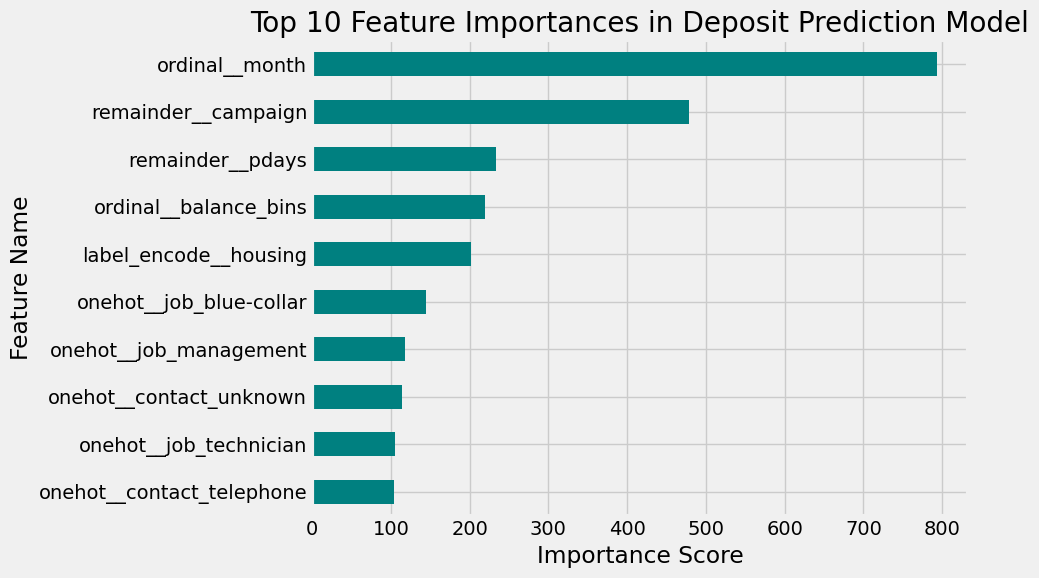

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
# Asumsi 'best_model' dan 'transformer' sudah didefinisikan

# 1. Menghitung dan Mengambil 10 Fitur Terpenting
# Menggunakan pd.Series yang berisi feature_importances_ dari model 
# dan nama fitur yang sudah di-transform.
feature_importances = pd.Series(
    best_model['model'].feature_importances_, 
    index=transformer.get_feature_names_out()
).sort_values(ascending=False).head(10)

# 2. Visualisasi Feature Importances (Bar Horizontal)
plt.figure(figsize=(10, 6)) 
feature_importances.plot(
    kind='barh', 
    title='Top 10 Feature Importances in Deposit Prediction Model',
    color='teal' # Menambahkan warna untuk estetika
)

# Menambahkan label dan layout agar rapi
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis() # Membalik urutan agar fitur paling penting di atas
plt.tight_layout()
plt.show()

## **Section 8. Model Deployment**

**10. Save Model**

Dari bagian EDA dan pemilihan model, kita dapat dengan jelas mengidentifikasi bahwa bulan campaign sangat berpengaruh untuk nasabah melakukan deposito atau tidak.

Menyimpan model menggunakan pickle agar dapat digunakan lagi di masa yang akan datang.

In [117]:
import pickle

In [121]:
# Asumsi 'best_model' sudah didefinisikan sebagai objek model Scikit-learn

# 1. KOREKSI PENTING: Latih model menggunakan DATA TRAINING (X_train dan y_train)
#    BUKAN menggunakan data keseluruhan (X dan y).

# best_model.fit(X, y) # HINDARI INI! Ini menyebabkan data bocor (data leakage)

# Ganti dengan:
best_model.fit(X_train, y_train) # Latih hanya pada data training

# 2. Simpan Model Menggunakan Pickle
filename = "D:\Purwadhika\Capstone Project 3/Bank Marketing Campaign Model.sav"

try:
    with open(filename, "wb") as file:
        pickle.dump(best_model, file)
    print(f"Model berhasil disimpan di: {filename}")
    
except Exception as e:
    print(f"Gagal menyimpan model: {e}")

[LightGBM] [Info] Number of positive: 2374, number of negative: 2374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 4748, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Model berhasil disimpan di: D:\Purwadhika\Capstone Project 3/Bank Marketing Campaign Model.sav


## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


Model *Light Gradient Boosting Machine* (LightGBM) yang telah disesuaikan (*tuned*) merupakan alat prediktif yang kuat untuk mengoptimalkan penargetan nasabah deposito, namun efektivitasnya bergantung pada pemahaman dan penanganan batasan fitur utamanya. Untuk mengimplementasikan model ini secara *robust* dan meminimalkan bias, **Tim Pemasaran** harus mengikuti panduan operasional spesifik yang dikembangkan oleh **Tim Analis**:

* **Fitur `job` (Pekerjaan):** Model ini hanya akurat untuk nasabah yang peran pekerjaannya termasuk dalam 11 kategori yang telah dilatih (seperti *admin*, *blue collar*, *management*, dll.). Oleh karena itu, Tim Pemasaran harus **mengecualikan** nasabah dengan kategori pekerjaan `unknown` dari *list* kontak aktif, karena prediksi untuk segmen ini rentan terhadap bias dan dapat menyebabkan pemborosan biaya pemasaran. **Tim Data Science** bertanggung jawab memonitor fluktuasi kategori pekerjaan `unknown` dan **melatih ulang** model jika kategori ini meningkat signifikan.

* **Fitur `contact` (Media Kontak):** Prediksi model dianggap paling andal untuk nasabah yang teridentifikasi memiliki saluran kontak **`celluler`** atau **`telephone`**. Nasabah dengan data kontak `unknown` harus ditempatkan pada **prioritas kontak terendah** atau dieliminasi dari daftar penargetan biaya tinggi. Implementasi ini harus sejalan dengan upaya **Tim Operasional** untuk secara proaktif melakukan **pengayaan data** guna mengurangi jumlah entri `unknown` dalam *database*.

* **Fitur `balance` (Saldo):** Meskipun saldo nasabah bersifat fluktuatif, model dilatih berdasarkan kategorisasi saldo (*very low*, *low*, *medium*, *high*). **Tim Analis** wajib memastikan bahwa batas *threshold* kategori saldo ini **disesuaikan secara berkala** (misalnya, triwulanan) berdasarkan persentil terkini dari basis nasabah. Langkah ini penting untuk menjaga relevansi model dengan kondisi keuangan nasabah yang berubah-ubah, memastikan bahwa penawaran deposito premium diarahkan secara akurat pada segmen *high balance* (saldo di atas $\text{Rp5.000}$).

Dengan mematuhi batasan ini, Bank X dapat memastikan bahwa pemanfaatan model LightGBM **memaksimalkan efisiensi anggaran** dan **meminimalkan risiko kerugian** akibat penargetan yang bias atau tidak relevan.

**9.2 What are the limitations of the model ?**

1. Limitasi pada fitur `job`
Model hanya mampu memprediksi pelanggan dengan peran pekerjaan yang terdaftar sebagai admin, services, housemaid, technician, management, student, blue collar, entrepreneur, retired, self-employed, unemployed. Untuk peran pekerjaan yang tidak ada dalam kolom, akan dikategorikan sebagai  `unknown` dan akan memberikan bias pada data.

2.  Limitasi pada fitur `contact`:
Selama proses pembuatan model, opsi contact yang tersedia adalah celluler, telephone, dan unknown. Oleh karena itu, ketika menemui data yang tidak dapat ditentukan, bisa dikategorikan sebagai tidak diketahui, meskipun ini mungkin memperkenalkan bias ke dalam data.

4. Limitasi pada fitur `balance`:Selama proses pembuatan model, saldo (balance) nasabah di kategorisasi menjadi very low, low, medium dan high. Very low dilihat dari kategori nasabah yang memiliki nilai minimum dari saldo sedangkan nilai high adalah saldo diatas 5000 (melihat nilai maksimum dari saldo nasabah)
Kategori tersebut bisa disesuaikan dengan saldo nasabah yang cendrung fluktuatif.

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)


In [122]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       594
           1       0.65      0.63      0.64       475

    accuracy                           0.69      1069
   macro avg       0.68      0.68      0.68      1069
weighted avg       0.68      0.69      0.69      1069



Model akhir yang kita gunakan adalah model Light Gradient Boosting Machine (LightGBM) yang sudah dilakukan tunning.


Jika kita menggunakan model tersebut untuk menyaring/memilih nasabah untuk penawaran deposito, model tersebut dapat mengurangi 77% nasabah yang tidak tertarik melakukan deposito untuk kita approach dan 60% nasabah yang diprediksi tertarik untuk kita approach.


Model kita ini memiliki ketepatan prediksi nasabah yang tertarik sebesar 68% (precisionnya), jadi setiap model kita memprediksi bahwa seorang nasabah itu tertarik, maka kemungkinan tebakannya benar itu sebesar 68%.


- Conclusion (Business)

Analisis bisnis:

Diasumsikan biaya pemasaran untuk satu pelanggan sekitar Rp50.000, kita memiliki total pelanggan 1000, di antaranya 500 tidak ingin membuka rekening deposito dan 500 ingin membuka rekening deposito, maka hitungannya kurang lebih akan seperti ini :


**Tanpa Model:**

- Total Biaya => 1000 x Rp50.000 = Rp50.000.000
- Total Nasabah Tertarik yang didapatkan => 1000 orang (karena semua nasabah ditawarkan)
- Total Kandidat Tertarik yang tidak didapatkan => 0 orang (karena semua kita tawarkan)
- Biaya yang terbuang => 500 x Rp50.000 = Rp25.000.000 (karena 500 orang menolak dan menjadi sia-sia)

**Dengan Model:**

Dengan Model (hanya nasabah yang diprediksi oleh model tertarik yang kita check dan tawarkan) :
- Total Biaya => (300 x Rp50.000) + (115 x Rp50.000) = Rp15.000.000 + Rp5.750.000 = Rp 20.750.0000
- Total Kandidat Tertarik yang didapatkan => 300 orang (karena recall 1/yg tertarik itu 60%)
- Total Kandidat Tertarik yang tidak didapatkan => 200 orang (karena recall 1/yg tertarik itu 60%)
- Biaya yang terbuang => 115 x Rp50.000 =Rp5.750.000 (berdasarkan recall 0/yg tidak tertarik (115 orang menolak tawaran/tidak tertarik))

Selisih tanpa model dan dengan model: 50.000.000 - 20.750.000 = Rp29.250.000

Berdasarkan perhitungan di atas, dapat disimpulkan bahwa dengan menggunakan model yang dibuat, bank dapat mengurangi biaya pemasaran dan potensi kerugian profit dari seorang pelanggan.

Model ini dapat digunakan oleh:
Bank’s Marketing Team.

**10.2 Recommendation**
- Recommendation (Model)
1. Akan lebih baik bila ada fitur durasi kontak saat melakukan penawaran deposito kepada nasabah untuk mempertajam analisis.
2. Akan lebih baik bila ada fitur suku bunga deposito yang ditawarkan, yang dapat berpotensi mempengaruhi keputusan seseorang untuk terlibat dalam deposito.
3. Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, coba gunakan teknik oversampling yang berbeda juga selain Random Over Sampling, seperti SMOTENC, SMoTENN, dll.

- Recommendation (Business)

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
1. Mendekati prospek pada awal periode bank (Mei-Juli) akan menjadi pilihan yang baik karena banyak yang telah menunjukkan hasil positif dari riwayat data.
2. Fokuskan kampanye deposito pada nasabah yang tidak memiliki cicilan KPR rumah dan pinjaman, karena analisis menyarankan bahwa nasabah tanpa cicilan KPR rumah lebih cenderung terlibat dengan penawaran deposito.
3. Membuka prospek yang lebih luas untuk menghubungi nasabah tidak terbatas dari nomor handphone (celluler) atau nomor telepon rumah. Karena banyak nasabah yang tidak memiliki device tersebut.
4. Semakin dekat hari dari kontak terakhir dengan klien dari kamapanye pemasaran sebelumnya tidak menjamin nasabah untuk tertarik membuka deposito. Jadi, setelah kampanye dilakukan tidak perlu terburu-buru untuk menghubungi nasabah karena dalam kurun waktu yang dekat dari kampanye dilakukan kemungkinan nasabah masih dalam pertimbangan.
5. Perlu ada pembaharuan data nasabah secara berkala karena berdasarkan data nasabah yang sudah pensiun, nasabah yang statusnya masih student dan nasabah yang tidak memiliki pekerjaan cendrung lebih tertarik untuk melakukan deposito.
